In [1]:
import numpy as np
from scipy.linalg import hilbert, solve
from numpy.linalg import norm, eigvalsh
import matplotlib.pyplot as plt

**Tasks 1-10:** arranged as 1, 6, 2, 7, 3, 8, 4, 9, 5, 10.

In [2]:
def steepest_descent(Q, b, x0, tol=1e-10, max_iter=10000):
    x = x0.copy()
    grad = Q @ x - b
    iterates = [x.copy()]
    for i in range(max_iter):
        grad = Q @ x - b
        if norm(grad) < tol:
            break
        alpha = grad.T @ grad / (grad.T @ Q @ grad)
        x = x - alpha * grad
        iterates.append(x.copy())
    return x, i+1, iterates

def linear_cg(Q, b, x0, tol=1e-10, max_iter=1000):
    x = x0.copy()
    r = b - Q @ x
    d = r.copy()
    iterates = [x.copy()]
    for i in range(max_iter):
        q = Q @ d
        alpha = (r @ r) / (d @ q)
        x = x + alpha * d
        r_new = r - alpha * q
        if norm(r_new) < tol:
            break
        beta = (r_new @ r_new) / (r @ r)
        d = r_new + beta * d
        r = r_new
        iterates.append(x.copy())
    return x, i+1, iterates

def report(n, method='SD'):
    print(f"\n=== {method} Method (n={n}) ===")
    Q = hilbert(n)
    b = np.ones(n)
    x_star = solve(Q, b)
    x0 = np.zeros(n)

    if method == 'SD':
        x_sol, iters, iterates = steepest_descent(Q, b, x0)
    else:
        x_sol, iters, iterates = linear_cg(Q, b, x0)

    grad_norm = norm(Q @ x_sol - b)
    dist_to_star = norm(x_sol - x_star)
    eigvals = eigvalsh(Q)
    cond_num = eigvals[-1] / eigvals[0]

    print(f"Solution x̃ = {x_sol}")
    print(f"‖∇f(x̃)‖ = {grad_norm:.2e}")
    print(f"‖x̃ − x*‖ = {dist_to_star:.2e}")
    print(f"Iterations = {iters}")
    print(f"Eigenvalues = {eigvals}")
    print(f"Condition number κ(Q) = {cond_num:.2e}")

    return Q, b, x_star, iterates, eigvals, cond_num

# Run for n = 5, 8, 10, 15, 20
ns = [5, 8, 10, 15, 20]

results = {}
for n in ns:
    Q, b, x_star, iterates_SD, eigvals_SD, cond_SD = report(n, method='SD')
    Q, b, x_star, iterates_CG, eigvals_CG, cond_CG = report(n, method='CG')
    results[n] = {
        'Q': Q,
        'b': b,
        'x_star': x_star,
        'SD': iterates_SD,
        'CG': iterates_CG,
        'eigvals': eigvals_CG,
        'cond': cond_CG
    }


=== SD Method (n=5) ===
Solution x̃ = [ -3.30336334  37.17132449 -52.55574935 -84.63030603 121.9388757 ]
‖∇f(x̃)‖ = 9.06e-03
‖x̃ − x*‖ = 1.35e+03
Iterations = 10000
Eigenvalues = [3.28792877e-06 3.05898040e-04 1.14074916e-02 2.08534219e-01
 1.56705069e+00]
Condition number κ(Q) = 4.77e+05

=== CG Method (n=5) ===
Solution x̃ = [    5.  -120.   630. -1120.   630.]
‖∇f(x̃)‖ = 5.80e-12
‖x̃ − x*‖ = 1.52e-08
Iterations = 7
Eigenvalues = [3.28792877e-06 3.05898040e-04 1.14074916e-02 2.08534219e-01
 1.56705069e+00]
Condition number κ(Q) = 4.77e+05

=== SD Method (n=8) ===
Solution x̃ = [  0.58246689 -21.74987624  85.07688549 -14.12025052 -96.0998764
 -91.9346522    1.15892973 166.62782014]
‖∇f(x̃)‖ = 1.95e-02
‖x̃ − x*‖ = 3.15e+05
Iterations = 10000
Eigenvalues = [1.11153902e-10 1.79887375e-08 1.29433209e-06 5.43694337e-05
 1.46768812e-03 2.62128436e-02 2.98125211e-01 1.69593900e+00]
Condition number κ(Q) = 1.53e+10

=== CG Method (n=8) ===
Solution x̃ = [-7.99999942e+00  5.03999966e+02 -7.55

C:\Users\diego\AppData\Local\Temp\ipykernel_16376\3694948554.py:36: LinAlgWarning: Ill-conditioned matrix (rcond=8.18724e-19): result may not be accurate.
  x_star = solve(Q, b)


Solution x̃ = [  1.93809987 -12.90161076 -14.23300466  43.77967856  53.61191515
  24.2425863  -19.0893723  -57.75167168 -81.27826785 -85.02590668
 -67.89920357 -30.76917638  24.51346041  95.70023854 180.47284498]
‖∇f(x̃)‖ = 2.43e-02
‖x̃ − x*‖ = 8.35e+08
Iterations = 10000
Eigenvalues = [-3.54116224e-18  1.55390879e-17  1.41928824e-16  1.39399791e-14
  9.32151793e-13  4.65778638e-11  1.80295975e-09  5.52898848e-08
  1.36158224e-06  2.71085392e-05  4.36476594e-04  5.63983476e-03
  5.72120925e-02  4.26627957e-01  1.84592775e+00]
Condition number κ(Q) = -5.21e+17

=== CG Method (n=15) ===
Solution x̃ = [ 1.30079159e+01 -1.92304888e+03  6.94827413e+04 -1.06703948e+06
  8.58939984e+06 -3.98109581e+07  1.08941059e+08 -1.65422921e+08
  9.23564806e+07  9.26460328e+07 -1.42943987e+08 -4.06102868e+07
  1.92446291e+08 -1.38904074e+08  3.37126151e+07]
‖∇f(x̃)‖ = 3.28e-06
‖x̃ − x*‖ = 7.40e+08
Iterations = 1000
Eigenvalues = [-3.54116224e-18  1.55390879e-17  1.41928824e-16  1.39399791e-14
  9.3215179

C:\Users\diego\AppData\Local\Temp\ipykernel_16376\3694948554.py:36: LinAlgWarning: Ill-conditioned matrix (rcond=2.93284e-20): result may not be accurate.
  x_star = solve(Q, b)


Solution x̃ = [ -0.24333018  13.96344769 -54.19326826  -0.80610076  47.10040849
  61.26572735  47.58309949  18.41088711 -15.51473131 -46.6237182
 -70.17444531 -83.53653981 -85.5330258  -75.93631518 -55.1096915
 -23.76223604  17.21425468  66.85126604 124.17065938 188.22563631]
‖∇f(x̃)‖ = 2.89e-02
‖x̃ − x*‖ = 7.27e+09
Iterations = 10000
Eigenvalues = [-1.60544557e-17 -1.06373889e-17 -2.59246940e-18  7.42419012e-18
  8.84351737e-18  2.14772636e-17  3.71161898e-16  1.73805771e-14
  6.74079533e-13  2.19289021e-11  6.03609535e-10  1.41395476e-08
  2.82765206e-07  4.83051005e-06  7.03343147e-05  8.67671109e-04
  8.96112861e-03  7.55958213e-02  4.87038407e-01  1.90713472e+00]
Condition number κ(Q) = -1.19e+17

=== CG Method (n=20) ===
Solution x̃ = [-1.63691072e+01  2.18346421e+03 -7.31036994e+04  1.04696026e+06
 -7.77863225e+06  3.22607577e+07 -7.35278643e+07  7.48631807e+07
  1.54059968e+07 -7.75344648e+07 -1.96914828e+07  7.20272605e+07
  5.36692615e+07 -4.37174680e+07 -8.82161725e+07 -6.35

In [3]:
def f(Q, b, x):
    return 0.5 * x.T @ Q @ x - b.T @ x

def verify_sd_inequality(Q, b, x_star, iterates, eigvals, n):
    print(f"\n=== SD Inequality Verification for n={n} ===")
    print("--- Theorem 3.3 (Inequality 3.29) ---")
    λ_min, λ_max = eigvals[0], eigvals[-1]
    ρ = 1 - (λ_min / λ_max)
    f_star = f(Q, b, x_star)
    f0 = f(Q, b, iterates[0])

    for k in [1, 2, 3, 5, 10]:
        if k >= len(iterates): break
        fxk = f(Q, b, iterates[k])
        lhs = fxk - f_star
        rhs = (ρ ** k) * (f0 - f_star)
        print(f"k={k:<2}: f(x_k) - f* = {lhs:.2e}, bound = {rhs:.2e}, OK? {lhs <= rhs}")

def verify_cg_inequality(Q, x_star, iterates, eigvals, n):
    print(f"\n=== linCG Inequality Verification for n={n} ===")
    print("--- Theorem 5.3 (Inequality 5.36) ---")
    λ_min, λ_max = eigvals[0], eigvals[-1]
    κ = λ_max / λ_min
    ρ = (np.sqrt(κ) - 1) / (np.sqrt(κ) + 1)

    normQ = lambda v: np.sqrt(v.T @ Q @ v)

    x0 = iterates[0]
    initial_norm = normQ(x0 - x_star)

    for k in [1, 2, 3, 5, 10]:
        if k >= len(iterates): break
        err = normQ(iterates[k] - x_star)
        bound = 2 * (ρ ** k) * initial_norm
        print(f"k={k:<2}: ‖x_k - x*‖_Q = {err:.2e}, bound = {bound:.2e}, OK? {err <= bound}")

# Run for specified values of n
for n in [5, 8, 10, 15, 20]:
    Q, b, x_star = results[n]['Q'], results[n]['b'], results[n]['x_star']
    eigvals = results[n]['eigvals']
    
    verify_sd_inequality(Q, b, x_star, results[n]['SD'], eigvals, n)
    verify_cg_inequality(Q, x_star, results[n]['CG'], eigvals, n)



=== SD Inequality Verification for n=5 ===
--- Theorem 3.3 (Inequality 3.29) ---
k=1 : f(x_k) - f* = 1.06e+01, bound = 1.25e+01, OK? True
k=2 : f(x_k) - f* = 9.60e+00, bound = 1.25e+01, OK? True
k=3 : f(x_k) - f* = 9.10e+00, bound = 1.25e+01, OK? True
k=5 : f(x_k) - f* = 8.65e+00, bound = 1.25e+01, OK? True
k=10: f(x_k) - f* = 8.16e+00, bound = 1.25e+01, OK? True

=== linCG Inequality Verification for n=5 ===
--- Theorem 5.3 (Inequality 5.36) ---
k=1 : ‖x_k - x*‖_Q = 4.60e+00, bound = 9.97e+00, OK? True
k=2 : ‖x_k - x*‖_Q = 4.15e+00, bound = 9.94e+00, OK? True
k=3 : ‖x_k - x*‖_Q = 3.51e+00, bound = 9.91e+00, OK? True
k=5 : ‖x_k - x*‖_Q = 2.50e-04, bound = 9.86e+00, OK? True

=== SD Inequality Verification for n=8 ===
--- Theorem 3.3 (Inequality 3.29) ---
k=1 : f(x_k) - f* = 2.90e+01, bound = 3.20e+01, OK? True
k=2 : f(x_k) - f* = 2.76e+01, bound = 3.20e+01, OK? True
k=3 : f(x_k) - f* = 2.69e+01, bound = 3.20e+01, OK? True
k=5 : f(x_k) - f* = 2.62e+01, bound = 3.20e+01, OK? True
k=10: 

C:\Users\diego\AppData\Local\Temp\ipykernel_16376\3393279178.py:24: RuntimeWarning: invalid value encountered in sqrt
  ρ = (np.sqrt(κ) - 1) / (np.sqrt(κ) + 1)


**Tasks 11-15:**

C:\Users\diego\AppData\Local\Temp\ipykernel_23344\336202125.py:34: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coeffs[k] = ((-1) ** ((k - 1) // 2)) / np.math.factorial(k)


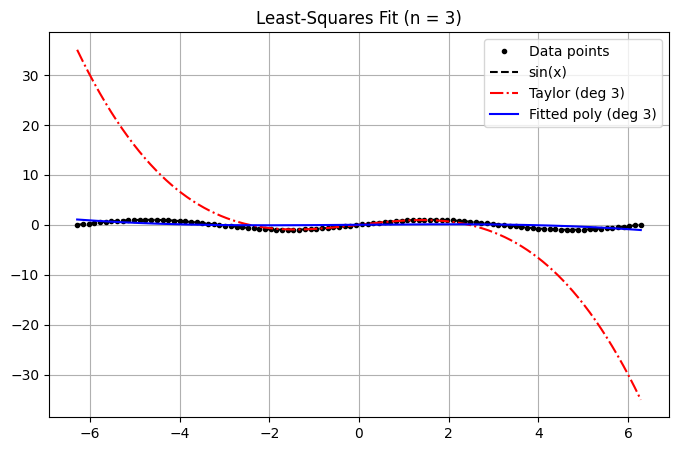


--- Task n=3 ---
Solution x̃ = [ 1.84392185e-17  7.54192604e-02  1.14065136e-15 -6.16916207e-03]
‖∇f(x̃)‖ = 1.27e-09
Number of iterations = 2


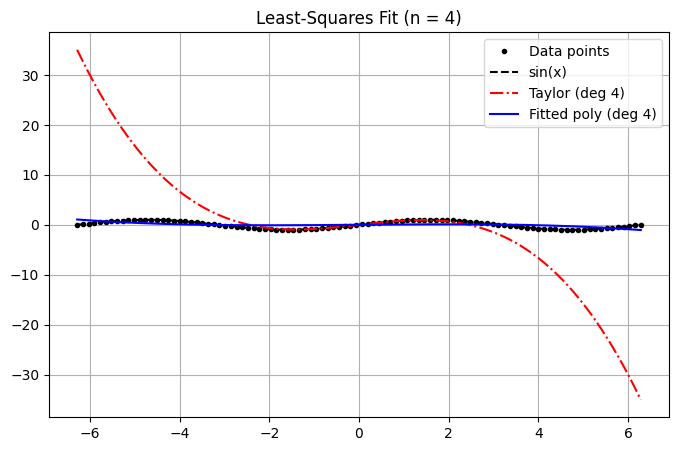


--- Task n=4 ---
Solution x̃ = [-4.82758946e-18  7.54192604e-02  4.74277821e-16 -6.16916207e-03
 -1.49703714e-17]
‖∇f(x̃)‖ = 1.23e-09
Number of iterations = 3


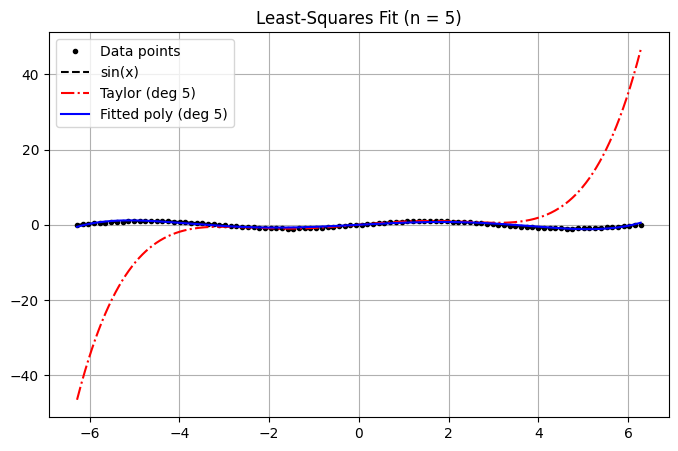


--- Task n=5 ---
Solution x̃ = [ 3.36115712e-17  6.25899031e-01  6.63576572e-15 -6.99985964e-02
 -2.13746437e-16  1.42717842e-03]
‖∇f(x̃)‖ = 2.66e-11
Number of iterations = 5


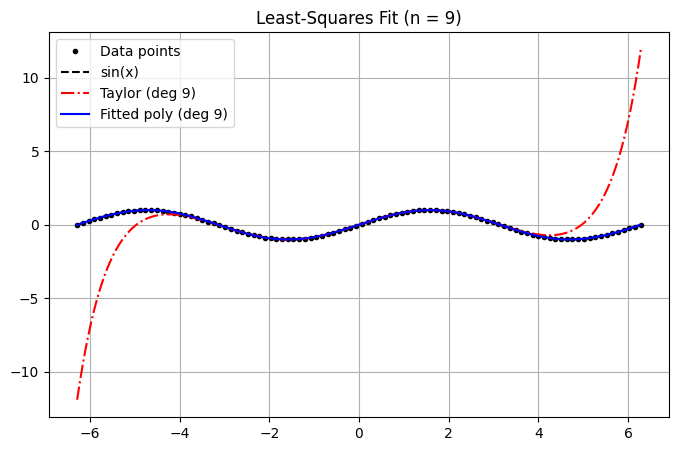


--- Task n=9 ---
Solution x̃ = [ 4.23930554e-13  9.90247683e-01  1.81361175e-12 -1.61218678e-01
 -2.58048056e-13  7.47634315e-03  1.07888850e-14 -1.42028271e-04
 -1.38795010e-16  1.01382623e-06]
‖∇f(x̃)‖ = 4.53e-09
Number of iterations = 22


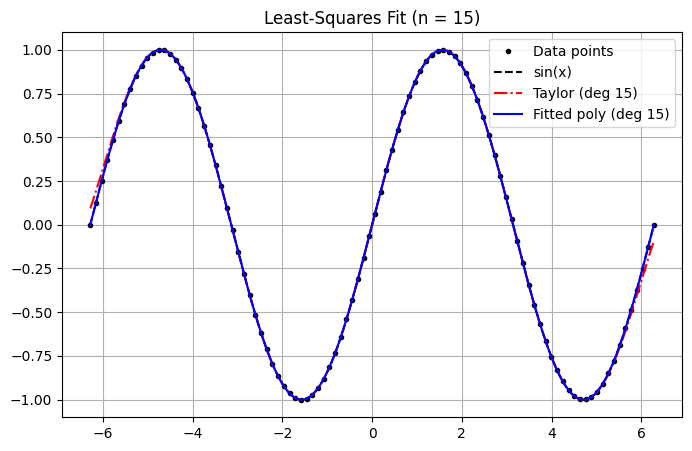


--- Task n=15 ---
Solution x̃ = [-2.92434449e-08  9.99997811e-01  4.25362386e-08 -1.66663921e-01
 -1.38295433e-08  8.33232536e-03  1.84956269e-09 -1.98246070e-04
 -1.23141906e-10  2.74105615e-06  4.31624426e-12 -2.43123030e-08
 -7.62069753e-14  1.38942273e-10  5.34092620e-16 -4.12022770e-13]
‖∇f(x̃)‖ = 2.21e-07
Number of iterations = 645


In [14]:
def create_least_squares_data(m=100):
    a = np.linspace(-2 * np.pi, 2 * np.pi, m)
    b = np.sin(a)
    return a, b

def vandermonde(a, degree):
    return np.vander(a, degree + 1, increasing=True)

def lin_cg(Q, b, tol=1e-6, max_iter=1000):
    x = np.zeros_like(b)
    r = b - Q @ x
    p = r.copy()
    rs_old = np.dot(r, r)
    iters = 0

    for _ in range(max_iter):
        Ap = Q @ p
        alpha = rs_old / (np.dot(p, Ap))
        x += alpha * p
        r -= alpha * Ap
        rs_new = np.dot(r, r)
        iters += 1
        if np.sqrt(rs_new) < tol:
            break
        p = r + (rs_new / rs_old) * p
        rs_old = rs_new

    return x, np.sqrt(rs_new), iters

def taylor_sin_coeffs(n):
    coeffs = [0] * (n + 1)
    for k in range(n + 1):
        if k % 2 == 1:
            coeffs[k] = ((-1) ** ((k - 1) // 2)) / np.math.factorial(k)
    return np.array(coeffs)

def solve_least_squares_task(n, m=100):
    a, b = create_least_squares_data(m)
    A = vandermonde(a, n)
    Q = A.T @ A
    rhs = A.T @ b

    x_fit, grad_norm, iters = lin_cg(Q, rhs)

    # Plot
    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    true_y = np.sin(x_vals)
    fit_y = np.polyval(x_fit[::-1], x_vals)
    taylor_y = np.polyval(taylor_sin_coeffs(n)[::-1], x_vals)

    plt.figure(figsize=(8, 5))
    plt.plot(a, b, 'ko', markersize=3, label='Data points')
    plt.plot(x_vals, true_y, 'k--', label='sin(x)')
    plt.plot(x_vals, taylor_y, 'r-.', label=f'Taylor (deg {n})')
    plt.plot(x_vals, fit_y, 'b-', label=f'Fitted poly (deg {n})')
    plt.title(f"Least-Squares Fit (n = {n})")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\n--- Task n={n} ---")
    print(f"Solution x̃ = {x_fit}")
    print(f"‖∇f(x̃)‖ = {grad_norm:.2e}")
    print(f"Number of iterations = {iters}")

# Run all tasks
for n in [3, 4, 5, 9, 15]:
    solve_least_squares_task(n)

**Tasks 16-20:**


--- Steepest Descent | l=2 ---
Solution x̃ = [ 1.08207085 -1.08207082 -4.73831041  4.73831042  0.74094557  0.74094556]
Final value f(x̃) = 12.648363443302172
‖∇f(x̃)‖ = 5.42e-07
Iterations = 54


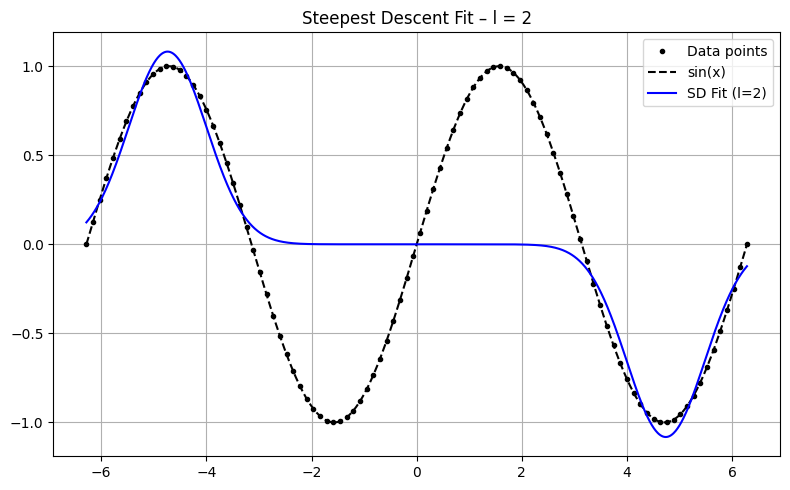

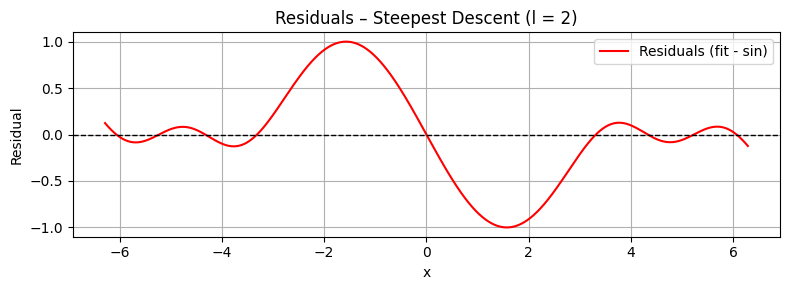


--- Steepest Descent | l=3 ---
Solution x̃ = [ 1.17342541  5.17218014 -4.10795582 -4.47291033  1.50119775  1.44395935
  0.99032386  1.60286019  2.33562636]
Final value f(x̃) = 0.3956159663782435
‖∇f(x̃)‖ = 2.49e-02
Iterations = 10000


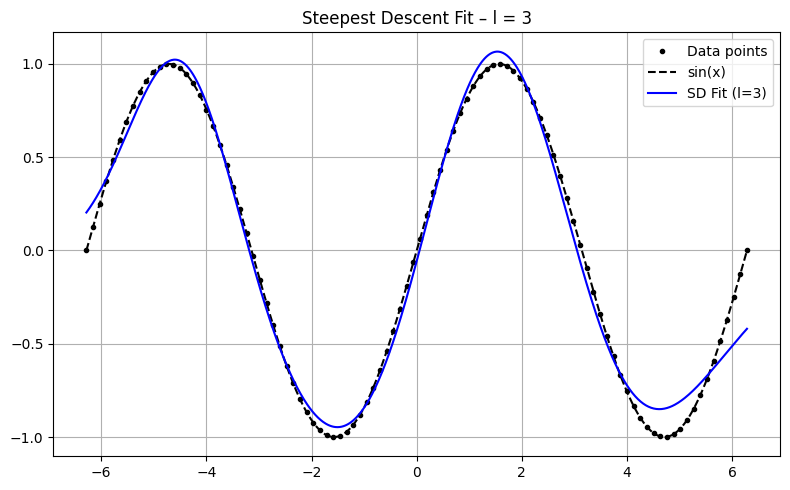

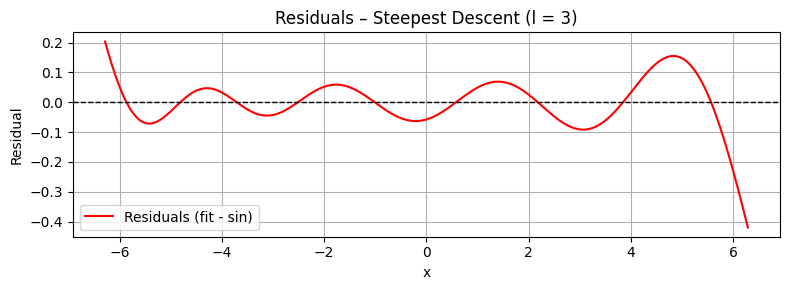


--- Steepest Descent | l=4 ---
Solution x̃ = [ 1.03810904 -1.0253258   1.02532578 -1.03810905 -4.63426589 -1.54441614
  1.54441615  4.63426588  0.88541878  0.97472333  0.97472331  0.88541879]
Final value f(x̃) = 0.07616919899969704
‖∇f(x̃)‖ = 8.54e-07
Iterations = 1079


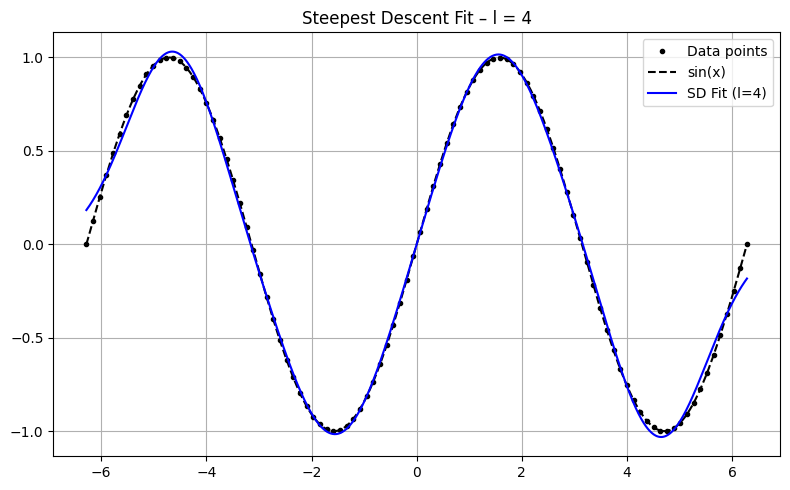

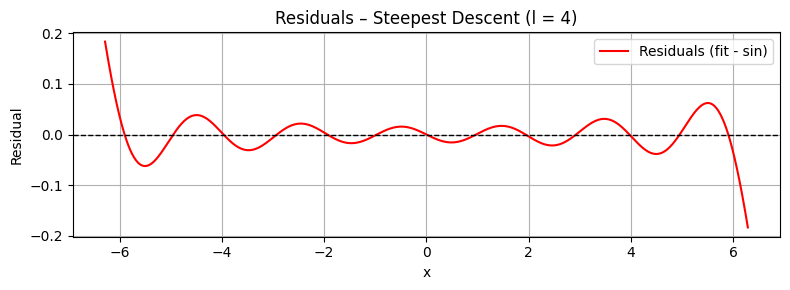


--- Steepest Descent | l=5 ---
Solution x̃ = [-0.71972049  1.47833388  4.02671113  2.69700882 -4.19373652 -6.48571745
 -4.87755048  0.78385955  2.52861612  1.34793538  1.47481472  1.21991187
  1.26362818  1.08467124  2.2043285 ]
Final value f(x̃) = 0.16870568155264742
‖∇f(x̃)‖ = 3.08e-02
Iterations = 10000


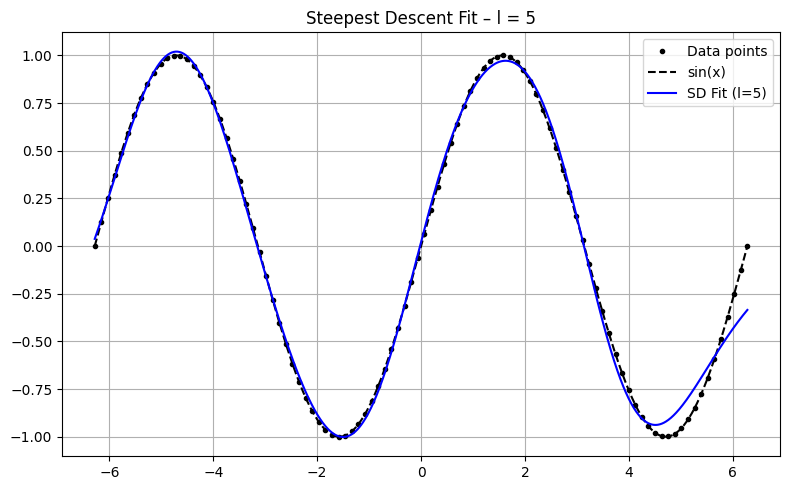

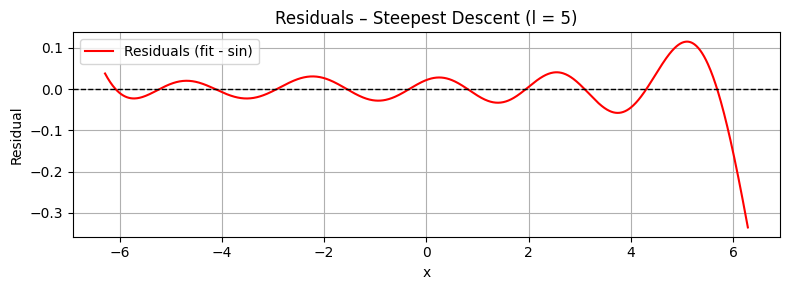


--- Steepest Descent | l=6 ---
Solution x̃ = [-1.19338457  1.46540963 -1.12645952  1.08292315 -1.0426558   0.48016476
 -7.02301258 -5.1076305  -1.62392489  1.53000885  4.61431924  6.75780638
  1.47248502  1.46457376 -1.28067542 -1.23161047  1.1471887   0.61599737]
Final value f(x̃) = 0.00020866371310662122
‖∇f(x̃)‖ = 1.21e-03
Iterations = 10000


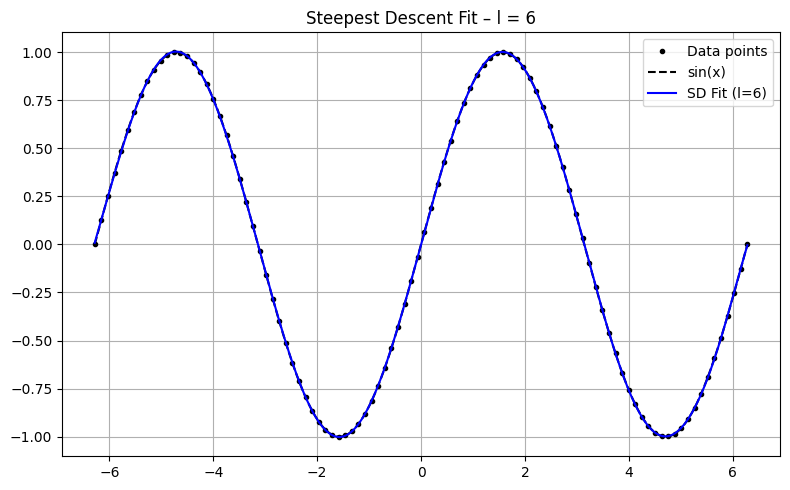

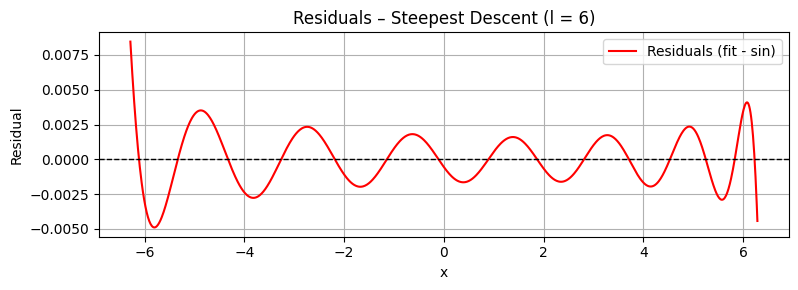

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_x0(l):
    alpha = np.random.uniform(0.5, 1.5, size=l)
    mu = np.linspace(-2 * np.pi, 2 * np.pi, l)
    sigma = np.full(l, 1.0)
    return np.concatenate([alpha, mu, sigma])

def create_least_squares_data(m=100):
    a = np.linspace(-2 * np.pi, 2 * np.pi, m)
    b = np.sin(a)
    return a, b

def sum_of_gaussians(x, t, l):
    alpha = x[:l]
    mu = x[l:2*l]
    sigma = x[2*l:]
    result = np.zeros_like(t)
    for i in range(l):
        result += alpha[i] * np.exp(- (t - mu[i])**2 / (2 * sigma[i]**2))
    return result

def objective_function(x, A, b, l):
    phi = sum_of_gaussians(x, A, l)
    return 0.5 * np.sum((phi - b)**2)

def gradient(x, A, b, l):
    grad = np.zeros_like(x)
    alpha = x[:l]
    mu = x[l:2*l]
    sigma = x[2*l:]
    phi = sum_of_gaussians(x, A, l)

    for i in range(l):
        exp_term = np.exp(- (A - mu[i])**2 / (2 * sigma[i]**2))
        diff = phi - b
        grad[i] = np.sum(diff * exp_term)
        grad[l + i] = np.sum(diff * alpha[i] * (A - mu[i]) * exp_term / (sigma[i]**2))
        grad[2 * l + i] = np.sum(diff * alpha[i] * (A - mu[i])**2 * exp_term / (sigma[i]**3))

    return grad

def backtracking_line_search(f, grad, x, direction, A, b, l, alpha=0.3, beta=0.8):
    t = 1.0
    f_x = f(x, A, b, l)
    grad_val = grad(x, A, b, l)
    while f(x + t * direction, A, b, l) > f_x + alpha * t * np.dot(grad_val, direction):
        t *= beta
    return t

def steepest_descent(f, grad, x0, A, b, l, tol=1e-6, max_iter=10000):
    x = x0.copy()
    iter_count = 0
    grad_val = grad(x, A, b, l)

    while np.linalg.norm(grad_val) > tol and iter_count < max_iter:
        grad_val = grad(x, A, b, l)
        direction = -grad_val
        step_size = backtracking_line_search(f, grad, x, direction, A, b, l)
        x -= step_size * grad_val
        iter_count += 1

    return x, f(x, A, b, l), np.linalg.norm(grad_val), iter_count

def solve_task(l):
    a, b = create_least_squares_data()
    best_fval = np.inf
    best_solution = None

    for i in range(5):  # Multiple restarts
        x0 = initialize_x0(l)
        x, fval, grad_norm, iters = steepest_descent(objective_function, gradient, x0, a, b, l)
        if fval < best_fval:
            best_fval = fval
            best_solution = (x, fval, grad_norm, iters)

    x, fval, grad_norm, iters = best_solution

    print(f"\n--- Steepest Descent | l={l} ---")
    print(f"Solution x̃ = {x}")
    print(f"Final value f(x̃) = {fval}")
    print(f"‖∇f(x̃)‖ = {grad_norm:.2e}")
    print(f"Iterations = {iters}")

    # --- Plot Fit ---
    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    true_y = np.sin(x_vals)
    fit_y = sum_of_gaussians(x, x_vals, l)

    plt.figure(figsize=(8, 5))
    plt.plot(a, b, 'ko', markersize=3, label='Data points')
    plt.plot(x_vals, true_y, 'k--', label='sin(x)')
    plt.plot(x_vals, fit_y, 'b-', label=f'SD Fit (l={l})')
    plt.title(f"Steepest Descent Fit – l = {l}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"sd_fit_l{l}.png", dpi=300)
    plt.show()

    # --- Plot Residuals ---
    residuals = fit_y - true_y
    plt.figure(figsize=(8, 3))
    plt.plot(x_vals, residuals, label='Residuals (fit - sin)', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f"Residuals – Steepest Descent (l = {l})")
    plt.xlabel("x")
    plt.ylabel("Residual")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"sd_residuals_l{l}.png", dpi=300)
    plt.show()

# Run for l = 2 to 6
for l in [2, 3, 4, 5, 6]:
    solve_task(l)


**Tasks 21-25:**


--- Newton's Method (l=2) ---
x̄ (solution) = [ 1.07820776 -1.04446208  1.63410141  4.68952467 -0.76859266  0.82693008]
Final f(x̃) = 12.548954394899177
‖∇f(x̃)‖ = 2.97e-07
Iterations = 22


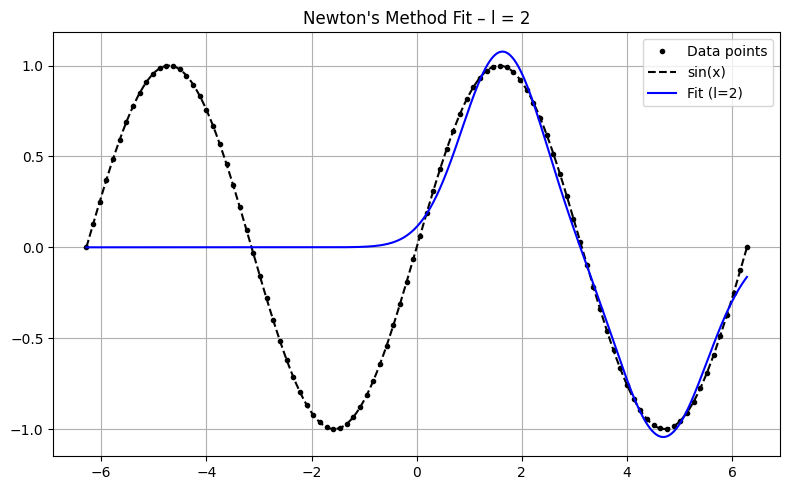

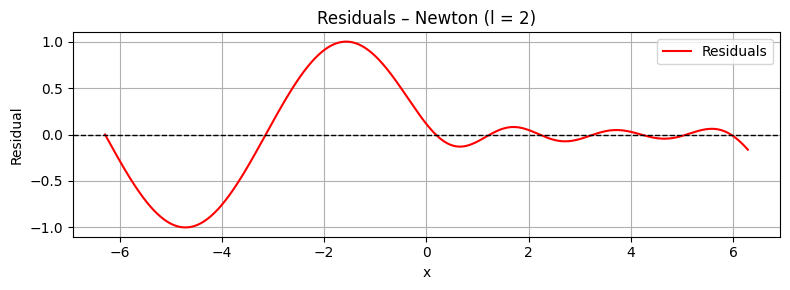


--- Newton's Method (l=3) ---
x̄ (solution) = [ 44.39092817   1.14706099 -43.43653628  -4.31671522   1.34571684
  -4.28914952   1.74331512   0.86168272   1.79438679]
Final f(x̃) = 6.421227126909359
‖∇f(x̃)‖ = 2.13e-04
Iterations = 10000


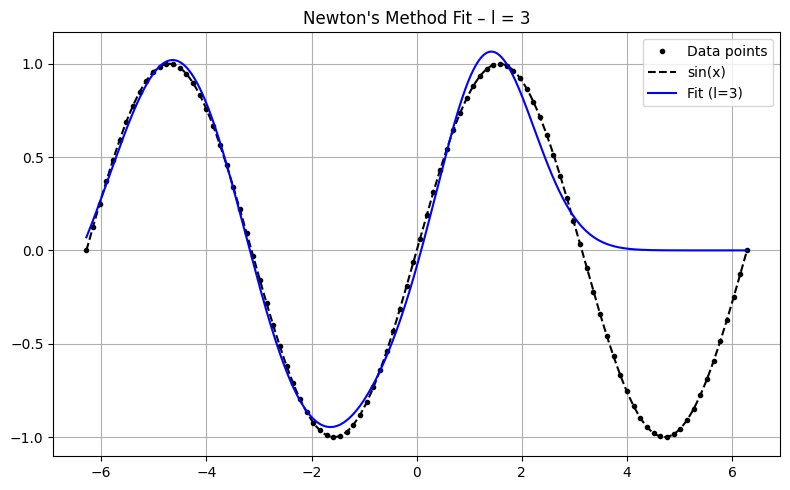

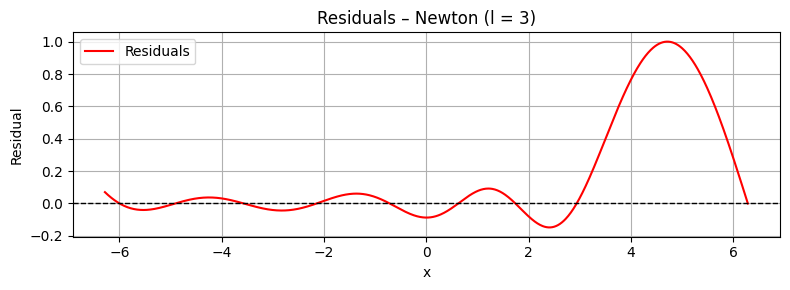


--- Newton's Method (l=4) ---
x̄ (solution) = [  1.0512184  -27.14676356  -1.22642656  26.14506799  -4.58221631
   4.60062098  -1.27761793   4.58271092   0.9253695    2.01271233
  -1.20158025  -2.15038993]
Final f(x̃) = 0.04644810896552546
‖∇f(x̃)‖ = 1.02e-06
Iterations = 10000


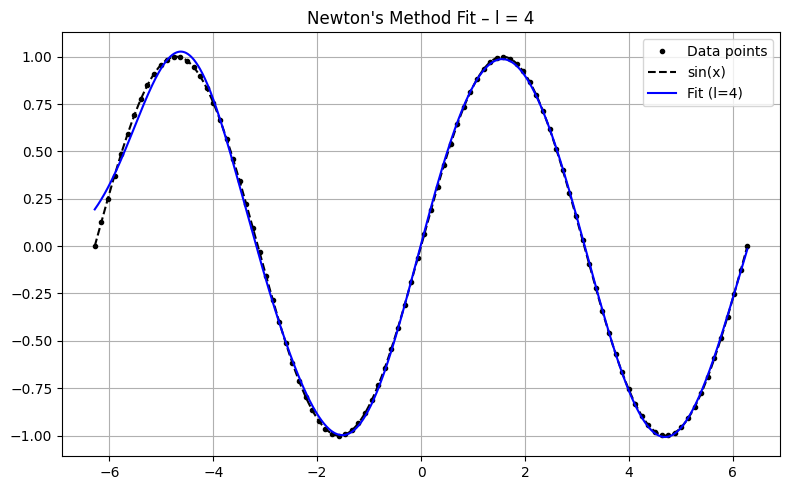

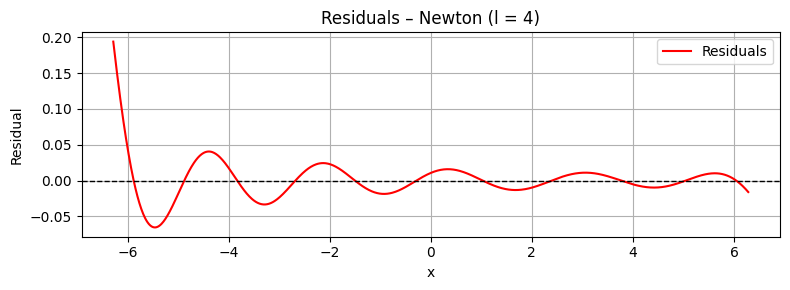


--- Newton's Method (l=5) ---
x̄ (solution) = [ 17.35116493 -16.38740267  13.37858861 -12.02627761  -3.67957454
  -4.58173703  -4.51326792   4.32401547   4.87051973   2.95103668
  -2.27433944  -2.65367993  -2.48931436  -1.94238678   1.73332286]
Final f(x̃) = 9.232297151639584e-06
‖∇f(x̃)‖ = 7.50e-07
Iterations = 5235


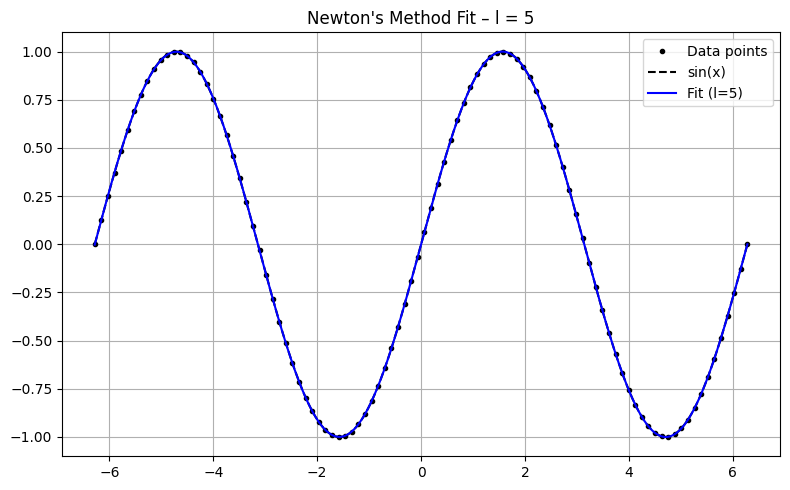

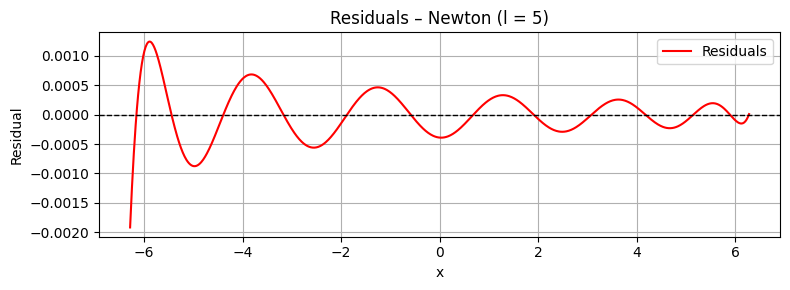


--- Newton's Method (l=6) ---
x̄ (solution) = [-6.99366979  6.03486251  1.20426124  0.66332369  6.07998913 -5.41137898
  4.99129386  5.36125017  1.3027673  -3.06190909 -4.83276167 -4.61587431
 -1.95137371  2.41662263 -1.59254493 -1.42485018  1.85329617 -2.79248695]
Final f(x̃) = 5.488250117099884e-07
‖∇f(x̃)‖ = 1.00e-06
Iterations = 3889


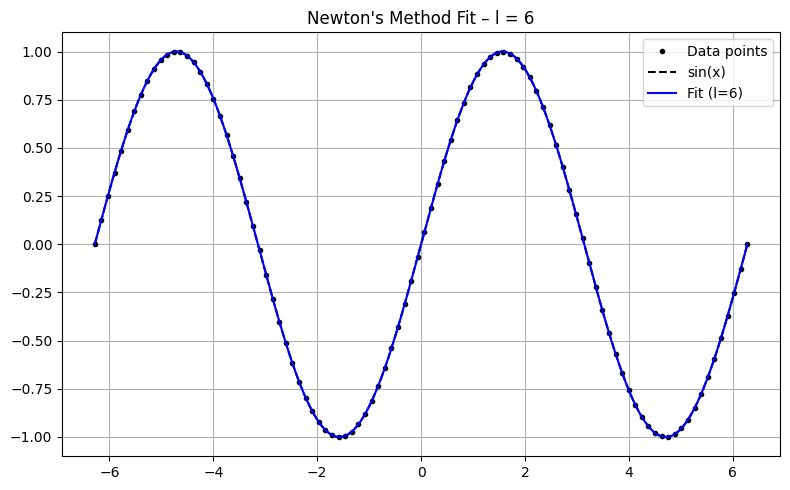

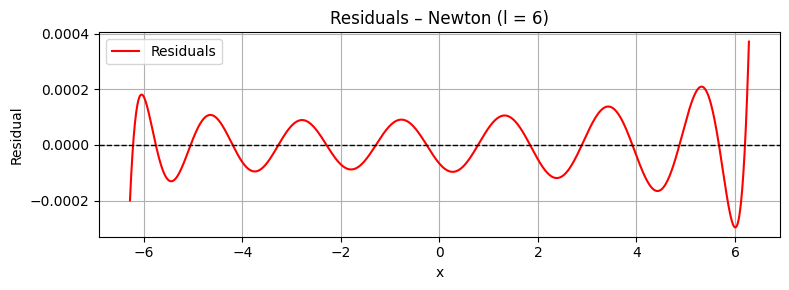

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate data
def create_least_squares_data(m=100):
    a = np.linspace(-2 * np.pi, 2 * np.pi, m)
    b = np.sin(a)
    return a, b

# 2. Sum of Gaussians model
def sum_of_gaussians(x, t, l):
    alpha = x[:l]
    mu = x[l:2*l]
    sigma = x[2*l:]
    result = np.zeros_like(t)
    for i in range(l):
        result += alpha[i] * np.exp(- (t - mu[i])**2 / (2 * sigma[i]**2))
    return result

# 3. Objective function (least squares)
def objective_function(x, A, b, l):
    phi = sum_of_gaussians(x, A, l)
    return 0.5 * np.sum((phi - b)**2)

# 4. Gradient of the objective function
def gradient(x, A, b, l):
    grad = np.zeros_like(x)
    alpha = x[:l]
    mu = x[l:2*l]
    sigma = x[2*l:]

    phi = sum_of_gaussians(x, A, l)

    for i in range(l):
        exp_term = np.exp(- (A - mu[i])**2 / (2 * sigma[i]**2))
        grad[i] = np.sum((phi - b) * exp_term)
        grad[l + i] = np.sum((phi - b) * alpha[i] * (A - mu[i]) * exp_term / (sigma[i]**2))
        grad[2 * l + i] = np.sum((phi - b) * alpha[i] * (A - mu[i])**2 * exp_term / (sigma[i]**3))

    return grad

# 5. Jacobian of phi(x)
def compute_jacobian(x, A, l):
    alpha = x[:l]
    mu = x[l:2*l]
    sigma = x[2*l:]
    m = len(A)
    J = np.zeros((m, 3 * l))

    for i in range(l):
        exp_term = np.exp(- (A - mu[i])**2 / (2 * sigma[i]**2))
        d_phi_d_alpha = exp_term
        d_phi_d_mu = alpha[i] * (A - mu[i]) * exp_term / (sigma[i]**2)
        d_phi_d_sigma = alpha[i] * (A - mu[i])**2 * exp_term / (sigma[i]**3)

        J[:, i] = d_phi_d_alpha
        J[:, l + i] = d_phi_d_mu
        J[:, 2 * l + i] = d_phi_d_sigma

    return J

# 6. Backtracking Line Search
def backtracking_line_search(f, grad, x, direction, A, b, l, alpha=0.3, beta=0.8):
    t = 1.0
    f_x = f(x, A, b, l)
    grad_val = grad(x, A, b, l)
    while f(x - t * direction, A, b, l) > f_x - alpha * t * np.dot(grad_val, direction):
        t *= beta
    return t

# 7. Gauss-Newton Method with Damping
def newtons_method(f, grad, x0, A, b, l, tol=1e-6, max_iter=10000, damping=1e-3):
    x = x0.copy()
    for iter_count in range(max_iter):
        grad_val = grad(x, A, b, l)
        if np.linalg.norm(grad_val) < tol:
            break

        J = compute_jacobian(x, A, l)
        H_approx = J.T @ J + damping * np.eye(3 * l)

        try:
            step = np.linalg.solve(H_approx, grad_val)
        except np.linalg.LinAlgError:
            step = grad_val

        step_size = backtracking_line_search(f, grad, x, step, A, b, l)
        x -= step_size * step

    return x, f(x, A, b, l), np.linalg.norm(grad_val), iter_count + 1

# 8. Solve and Plot
def solve_task(l):
    a, b = create_least_squares_data()
    best_fval = np.inf
    best_solution = None

    for i in range(5):  # Multiple restarts
        x0 = np.random.randn(3 * l)
        x, fval, grad_norm, iters = newtons_method(objective_function, gradient, x0, a, b, l)
        if fval < best_fval:
            best_fval = fval
            best_solution = (x, fval, grad_norm, iters)

    x, fval, grad_norm, iters = best_solution

    print(f"\n--- Newton's Method (l={l}) ---")
    print(f"x̄ (solution) = {x}")
    print(f"Final f(x̃) = {fval}")
    print(f"‖∇f(x̃)‖ = {grad_norm:.2e}")
    print(f"Iterations = {iters}")

    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    true_y = np.sin(x_vals)
    fit_y = sum_of_gaussians(x, x_vals, l)

    # --- Save Model Fit Plot ---
    plt.figure(figsize=(8, 5))
    plt.plot(a, b, 'ko', markersize=3, label='Data points')
    plt.plot(x_vals, true_y, 'k--', label='sin(x)')
    plt.plot(x_vals, fit_y, 'b-', label=f'Fit (l={l})')
    plt.title(f"Newton's Method Fit – l = {l}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"newton_fit_l{l}.png", dpi=300)
    plt.show()
    plt.close()

    # --- Save Residual Plot ---
    residuals = fit_y - np.sin(x_vals)
    plt.figure(figsize=(8, 3))
    plt.plot(x_vals, residuals, label='Residuals', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f"Residuals – Newton (l = {l})")
    plt.xlabel("x")
    plt.ylabel("Residual")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"newton_residuals_l{l}.png", dpi=300)
    plt.show()
    plt.close()

# 9. Run for l = 2 to 6
for l in [2, 3, 4, 5, 6]:
    solve_task(l)


**Tasks 26-30:**


--- NonlinCG l=2 ---
Solution x̃ = [ 1.08209088  1.10140031 -4.73845146  1.57061559  0.74101452  0.70710386]
Final value f(x̃) = 12.714228
‖∇f(x̃)‖ = 2.99e-03
Iterations = 10000


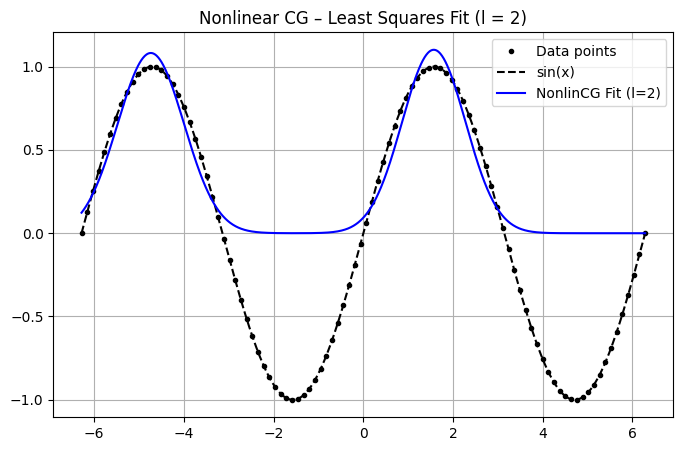

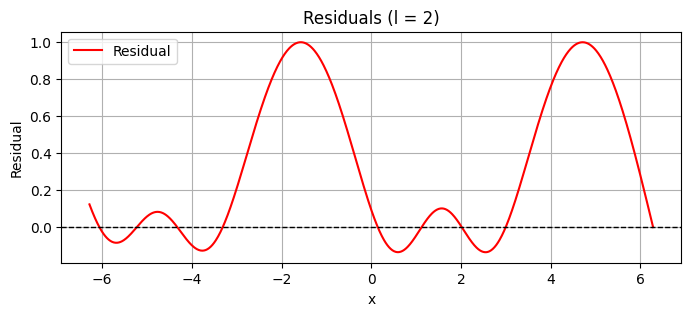


--- NonlinCG l=3 ---
Solution x̃ = [ 1.08207753  1.07814169 -1.04441574 -4.73831693  1.63410344  4.68956375
  0.74094938  0.76862763  0.82699817]
Final value f(x̃) = 6.503113
‖∇f(x̃)‖ = 8.77e-04
Iterations = 10000


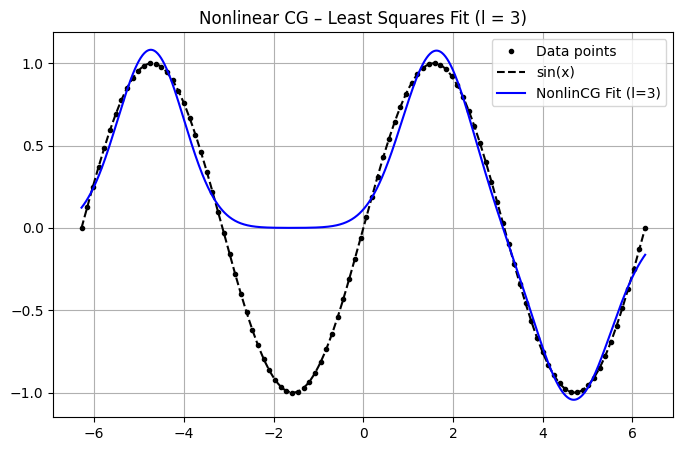

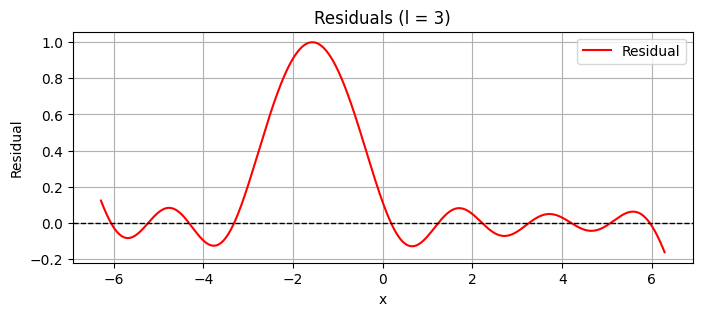


--- NonlinCG l=4 ---
Solution x̃ = [ 1.0381828  -1.02496817  1.02489661 -1.03814276 -4.63345922 -1.54334116
  1.54357032  4.63323694  0.88622275  0.97736494  0.97759269  0.88648064]
Final value f(x̃) = 0.080816
‖∇f(x̃)‖ = 3.87e-03
Iterations = 10000


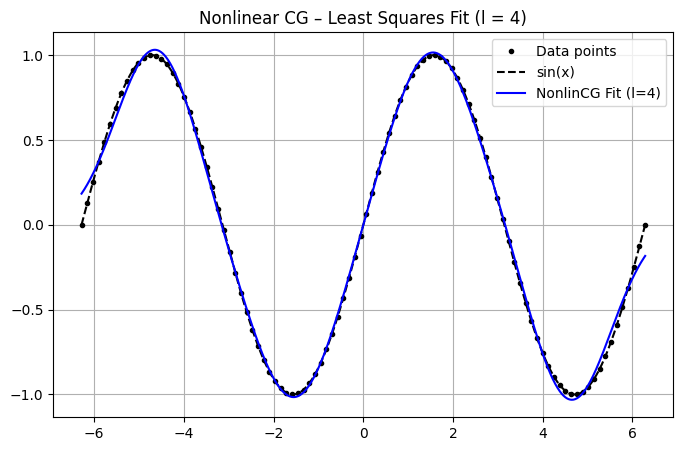

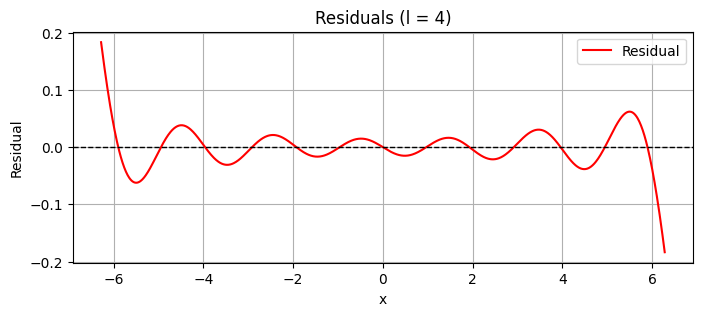


--- NonlinCG l=5 ---
Solution x̃ = [ 1.0374758  -1.01793362  0.74995724  0.59685768 -1.03444646 -4.6361447
 -1.56649966  1.07487595  2.1500961   4.67334114  0.88425465  0.95990503
  0.74160301  0.65186319  0.85271719]
Final value f(x̃) = 0.076860
‖∇f(x̃)‖ = 1.07e-02
Iterations = 10000


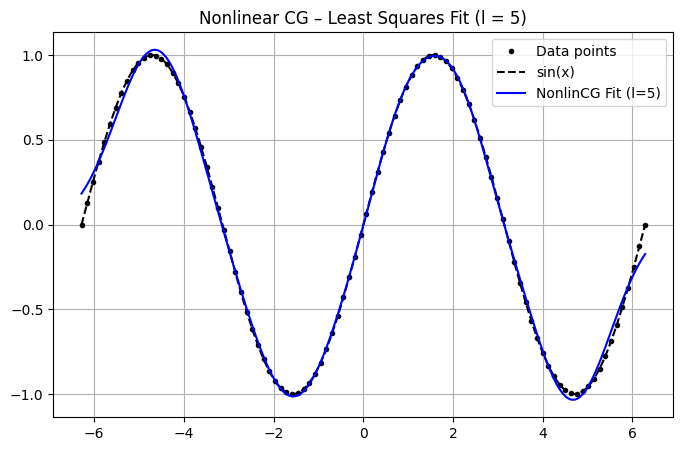

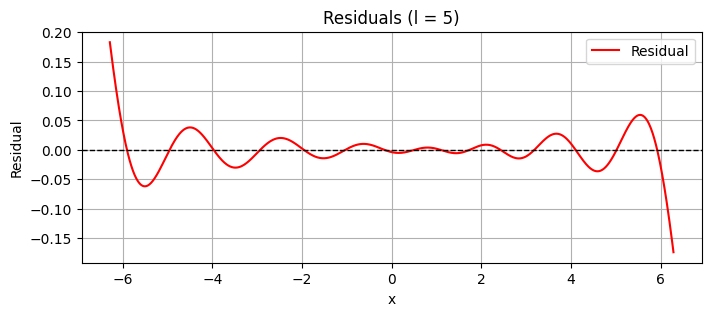


--- NonlinCG l=6 ---
Solution x̃ = [ 0.85091122  0.41908544 -1.5458107   1.4230653  -0.99703155 -1.88877722
 -4.30405984 -5.3002177  -1.30116507  2.94290646  3.37724919  4.93000392
  0.80588402  0.48691283  1.26406645  3.15111775  0.95501663  1.06157375]
Final value f(x̃) = 0.022281
‖∇f(x̃)‖ = 6.96e-03
Iterations = 10000


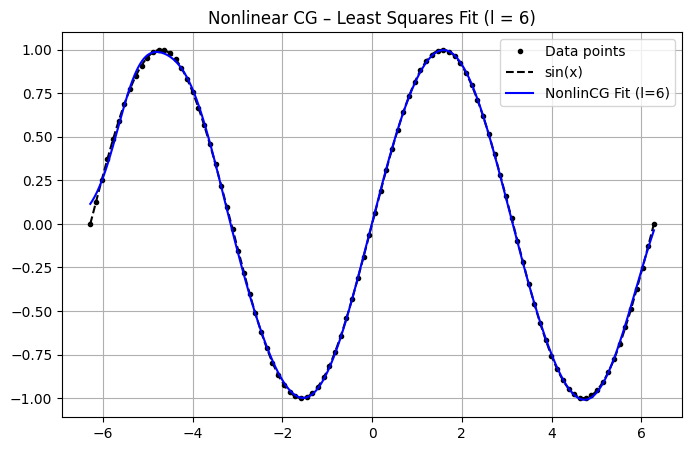

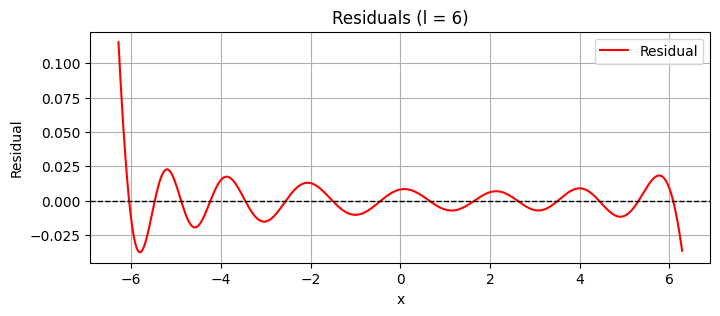

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create least squares data
def create_least_squares_data(m=100):
    a = np.linspace(-2 * np.pi, 2 * np.pi, m)
    b = np.sin(a)
    return a, b

# Sum of Gaussians model
def sum_of_gaussians(x, t, l):
    alpha = x[:l]
    mu = x[l:2*l]
    sigma = x[2*l:]
    result = np.zeros_like(t)
    for i in range(l):
        result += alpha[i] * np.exp(- (t - mu[i])**2 / (2 * sigma[i]**2))
    return result

# Objective function with regularization
def objective_function(x, A, b, l, lambda_reg=1e-3):
    phi = sum_of_gaussians(x, A, l)
    reg = lambda_reg * np.sum(1.0 / (x[2*l:] + 1e-6)**2)
    return 0.5 * np.sum((phi - b)**2) + reg

# Gradient of the objective function
def gradient(x, A, b, l):
    grad = np.zeros_like(x)
    alpha = x[:l]
    mu = x[l:2*l]
    sigma = x[2*l:]

    phi = sum_of_gaussians(x, A, l)

    for i in range(l):
        grad[i] = np.sum((phi - b) * np.exp(- (A - mu[i])**2 / (2 * sigma[i]**2)))
        grad[l + i] = np.sum((phi - b) * alpha[i] * (A - mu[i]) * np.exp(- (A - mu[i])**2 / (2 * sigma[i]**2)) / (sigma[i]**2))
        grad[2 * l + i] = np.sum((phi - b) * alpha[i] * (A - mu[i])**2 * np.exp(- (A - mu[i])**2 / (2 * sigma[i]**2)) / (sigma[i]**3))
    return grad

# Backtracking line search
def backtracking_line_search(f, grad, x, direction, A, b, l, alpha=0.3, beta=0.8):
    t = 1.0
    f_x = f(x, A, b, l)
    grad_val = grad(x, A, b, l)
    while f(x + t * direction, A, b, l) > f_x + alpha * t * np.dot(grad_val, direction):
        t *= beta
    return t

# Smarter initialization using clustering
def smart_initialize_x0(a, b, l):
    data = np.vstack((a, b)).T
    kmeans = KMeans(n_clusters=l, n_init=10, random_state=42).fit(data)
    mu = np.sort(kmeans.cluster_centers_[:, 0])
    alpha = np.ones(l)
    sigma = np.full(l, 1.0)
    return np.concatenate([alpha, mu, sigma])

# Nonlinear Conjugate Gradient with Polak–Ribière+ and restarts
def nonlin_cg(f, grad, x0, A, b, l, tol=1e-6, max_iter=10000):
    x = x0.copy()
    grad_val = grad(x, A, b, l)
    r = -grad_val
    p = r.copy()
    iter_count = 0
    restart_every = 20

    while np.linalg.norm(grad_val) > tol and iter_count < max_iter:
        Ap = grad(x + p, A, b, l) - grad_val
        if np.dot(p, Ap) == 0:
            break
        alpha_step = np.dot(r, r) / np.dot(p, Ap)
        step_size = backtracking_line_search(f, grad, x, p, A, b, l)
        x += step_size * p
        r_new = -grad(x, A, b, l)
        beta = max(0, np.dot(r_new, r_new - r) / np.dot(r, r))
        if iter_count % restart_every == 0 or np.dot(r_new, p) >= 0:
            p = r_new.copy()
        else:
            p = r_new + beta * p
        r = r_new
        grad_val = grad(x, A, b, l)
        iter_count += 1

    return x, f(x, A, b, l), np.linalg.norm(grad_val), iter_count

# Solve task for given l
def solve_task(l):
    a, b = create_least_squares_data()
    best_fval = np.inf
    best_solution = None

    for i in range(10):  # More restarts
        x0 = smart_initialize_x0(a, b, l)
        x, fval, grad_norm, iters = nonlin_cg(objective_function, gradient, x0, a, b, l)
        if fval < best_fval:
            best_fval = fval
            best_solution = (x, fval, grad_norm, iters)

    x, fval, grad_norm, iters = best_solution

    print(f"\n--- NonlinCG l={l} ---")
    print(f"Solution x̃ = {x}")
    print(f"Final value f(x̃) = {fval:.6f}")
    print(f"‖∇f(x̃)‖ = {grad_norm:.2e}")
    print(f"Iterations = {iters}")

    # Plot fit
    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    true_y = np.sin(x_vals)
    fit_y = sum_of_gaussians(x, x_vals, l)

    plt.figure(figsize=(8, 5))
    plt.plot(a, b, 'ko', markersize=3, label='Data points')
    plt.plot(x_vals, true_y, 'k--', label='sin(x)')
    plt.plot(x_vals, fit_y, 'b-', label=f'NonlinCG Fit (l={l})')
    plt.title(f"Nonlinear CG – Least Squares Fit (l = {l})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals
    residuals = fit_y - true_y
    plt.figure(figsize=(8, 3))
    plt.plot(x_vals, residuals, color='red', label='Residual')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f"Residuals (l = {l})")
    plt.xlabel("x")
    plt.ylabel("Residual")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run for multiple l values
for l in [2, 3, 4, 5, 6]:
    solve_task(l)
